# DATA CLEANING AND EDA

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# READING THE CSV FILE

In [2]:
df_zomato = pd.read_csv("zomato.csv")
df_zomato.head()
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [3]:
df_zomato.shape

(51717, 17)

IT CAN BE OBSERVED MANY ATTRIBUTES HAVE MISSING VALUES

Dish liked has the most null attributes
not a good idea to use it for analysis of ALL restaurants

In [4]:
df_zomato[["dish_liked"]]

,dish_liked
0,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja..."
1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G..."
2,"Churros, Cannelloni, Minestrone Soup, Hot Choc..."
3,Masala Dosa
4,"Panipuri, Gol Gappe"
...,...
51712,NaN
51713,NaN
51714,NaN
51715,"Cocktails, Pizza, Buttermilk"


In [5]:
df_zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
#Dropping Columns not needed at the moment
df_zomato = df_zomato.drop(['url','phone'],axis = 1)
df_zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
#Removing all duplicate valuesdf_zomato.drop_duplicates(inplace = True)

In [8]:
df_zomato.drop_duplicates(inplace = True)
df_zomato.shape

(51674, 15)

THIS HOWEVER DOES NOT TAKE CARE OF REMOVAL OF RESTAURANTS WITH SAME NAME

In [9]:
example = df_zomato[df_zomato['name'] == 'Jalsa']
example

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
456,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Banashankari
559,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Banashankari
2488,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Basavanagudi
2966,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Basavanagudi
3462,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,804,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Paneer Lajawab, Masala Pa...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n Super ambience\nGreat...",[],Dine-out,Basavanagudi
7607,"25/7, Doddannakundi, Outer Ring Road, Mahadeva...",Jalsa,Yes,Yes,4.2/5,2173,Marathahalli,Casual Dining,"Mutton Curry, Stuffed Mushroom, Laccha Paratha...","North Indian, Mughlai","1,500","[('Rated 4.0', 'RATED\n A pretty decent place...",[],Delivery,Brookefield
19401,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Jayanagar
20399,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Jayanagar
21302,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Jayanagar


DIFFERENCE IS THE LISTED IN TYPE AND LISTED IN CITY REST ALL VALUES THE SAME  
Will decide whether to club or keep as is depending in criterion for the model chosen

# OBSERVING ONLINE ORDER RATIO

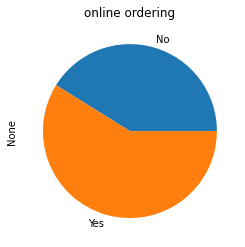

In [10]:
k = df_zomato.groupby(['online_order']).size().plot(kind='pie', title = 'online ordering')

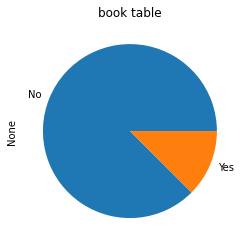

In [11]:
k = df_zomato.groupby(['book_table']).size().plot(kind='pie', title = 'book table')

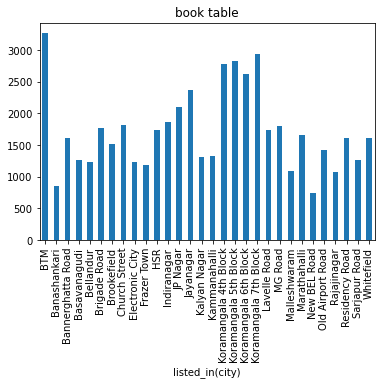

In [12]:
k = df_zomato.groupby(['listed_in(city)']).size().plot(kind='bar', title = 'book table')
#btm layout has max number of restaurants

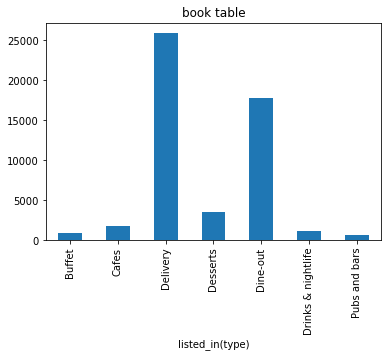

In [13]:
k = df_zomato.groupby(['listed_in(type)']).size().plot(kind='bar', title = 'book table')
#delivery takes the lead in modern bangalore

In [14]:
#now i will try to get the number of high rated restaurants in bangalore grouped by area
#first i will clean the rating column
df_zomato['rate'].isnull().sum()

7767

In [15]:
#7767 vlaues have been left null

In [16]:
#will see number of null values
#convert all null to 0
#then see if 0 and null are equal
#df_zomato['rate'].fillna(0, inplace = True)


In [17]:
#upon working on rate column pbserved that data has characters like /
df_zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:

def handlerate(value):
    if value=='-' or value == 'NEW':
        return np.nan

    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df_zomato['rate'] = df_zomato['rate'].apply(handlerate)


In [19]:
df_zomato['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51674, dtype: float64

In [20]:
df_zomato['rate'].isnull().sum()

10036

In [21]:
#koramangala 7th block has the highest rated restaurants
#now we can analyse the costs of restaurants in bangalore
df_zomato['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [22]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df_zomato['approx_cost(for two people)'] = df_zomato['approx_cost(for two people)'].apply(handlecomma)
df_zomato['approx_cost(for two people)'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
df_zomato['approx_cost(for two people)'].min()

40.0

In [24]:
df_zomato['approx_cost(for two people)'].max()

6000.0

# SEEING DISTRIBUTION OF HIGH RATED RESTAURANTS

In [25]:
df_high = df_zomato.query('rate > 4')

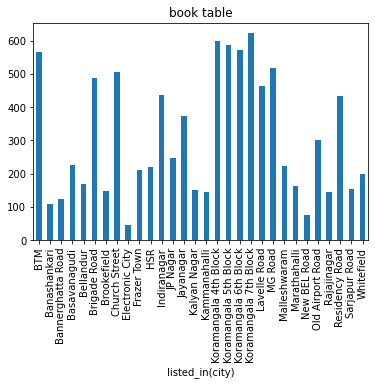

In [26]:
k = df_high.groupby(['listed_in(city)']).size().plot(kind='bar', title = 'book table')

# Cost VS Rating Scatterplot for predicting correlation

In [27]:

cost_dist=df_zomato[['rate','approx_cost(for two people)','online_order']].dropna(axis = 0,how = "any")


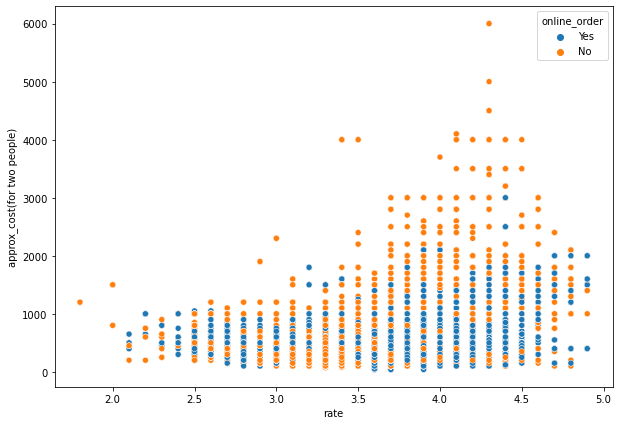

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

### Explantory variable: Rating
### Response variable: Cost

In [29]:
xarr=cost_dist['rate'].to_numpy()
yarr=cost_dist['approx_cost(for two people)'].to_numpy()


### Calculating persons moment correlation coefficient

In [30]:
R = np.corrcoef(xarr, yarr)
print(R[0,1])

0.3850604365893679


### Since R > 0 we can say that rate and cost are positively correlated YET there are no definitive results

In [31]:
df_zomato['rest_type'].value_counts()

Quick Bites                   19114
Casual Dining                 10322
Cafe                           3730
Delivery                       2600
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Pop Up                            2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

# Cleaning cuisines model

In [32]:
cuisines = df_zomato['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df_zomato['cuisines'] = df_zomato['cuisines'].apply(handle_cuisines)
df_zomato['cuisines'].value_counts()

others                                 26440
North Indian                            2912
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  917
                                       ...  
Italian, Pizza                           105
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

### Plotting the Correlation Matrix

In [33]:
df2= df_zomato
df2.dropna(how='any',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      23248 non-null  object 
 1   name                         23248 non-null  object 
 2   online_order                 23248 non-null  object 
 3   book_table                   23248 non-null  object 
 4   rate                         23248 non-null  float64
 5   votes                        23248 non-null  int64  
 6   location                     23248 non-null  object 
 7   rest_type                    23248 non-null  object 
 8   dish_liked                   23248 non-null  object 
 9   cuisines                     23248 non-null  object 
 10  approx_cost(for two people)  23248 non-null  float64
 11  reviews_list                 23248 non-null  object 
 12  menu_item                    23248 non-null  object 
 13  listed_in(type) 

In [34]:
#Encode the input Variables 
def Encode(zomato): 
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0] 
    return zomato
                     
zomato_en = Encode(df2.copy())

<AxesSubplot:>

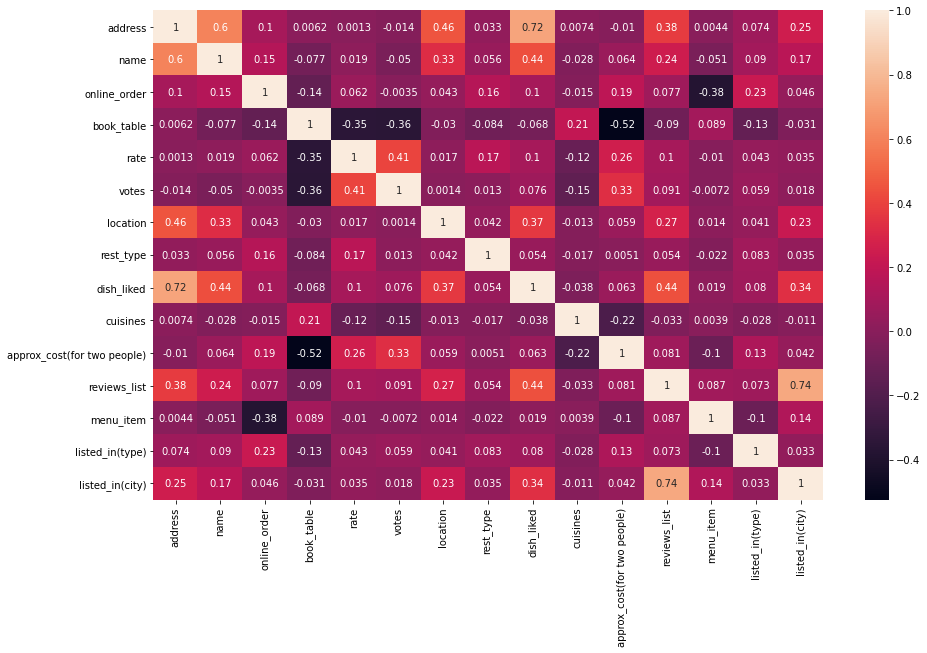

In [35]:
corr=zomato_en.corr(method='kendall')
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)

#### The highest spurious correlation is between review_list and listed_in(city) = 0.74
#### book_table and approx_cost(for 2 people) is negatively correlated= -0.52
#### Restaurants which provide an option of booking table in advance has a high average cost.

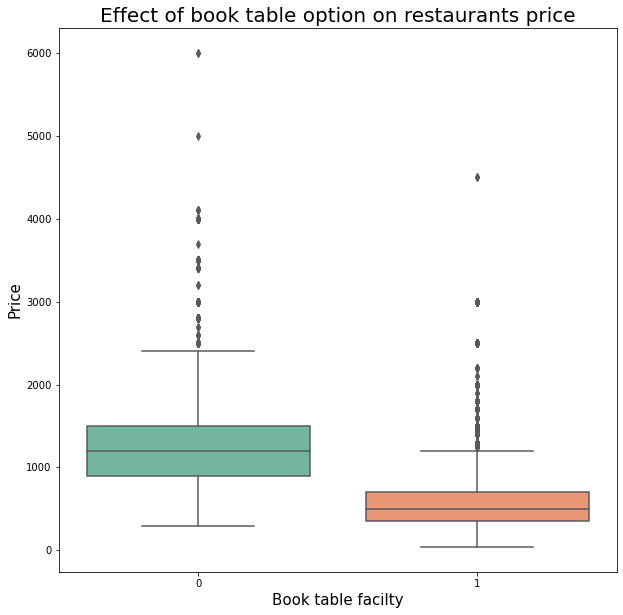

In [36]:
plt_1 = plt.figure(figsize=(10, 10))
sns.boxplot(x='book_table',y='approx_cost(for two people)',palette="Set2",data=zomato_en)
plt.xlabel('Book table facilty',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Effect of book table option on restaurants price',fontsize=20)
plt.show()

#### Green box plot for restaurants that provide online booking facility
#### Orange plot for restaurants that do not provide online booking facility

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

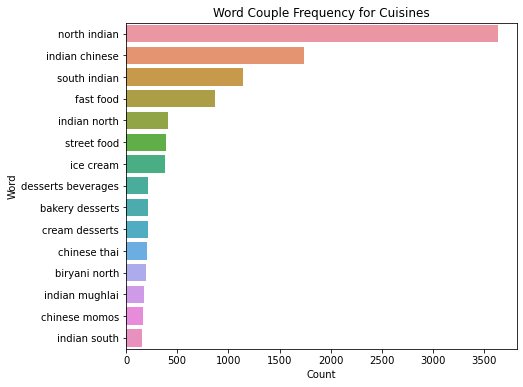

In [38]:
# Top 15 two word frequencies for Cuisines
lst = get_top_words(df_zomato['cuisines'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

### Thus from the above graph we conclude that north indiam is the most popular cuisine in bangalore

# CONTENT BASED MODEL FOR RECOMMENDATION OF SIMILIAR RESTAURANTS

# CLEANING THE REVIEWS COLUMN 

In [39]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [40]:
# REPEATED RESTAURANTS HAVE THE SAME RATING WHEN THEY ARE PRESENT IN THE SAME AREA

# PREPROCESSING THE REVIEWS 

In [41]:
#Applying the most basic methods first

# can do semantic ananlysis of reviews to ensure that the restaurant is liked by the users as well

In [42]:
## Lower Casing

df_zomato["reviews_list"] = df_zomato["reviews_list"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df_zomato["reviews_list"] = df_zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

# Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_zomato["reviews_list"] = df_zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

#Cleaning URL
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df_zomato["reviews_list"] = df_zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [43]:
df_zomato[df_zomato['address'] == '942, 21st Main Road, 2nd Stage, Banashankari, Bangalore']

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari
456,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Delivery,Banashankari
559,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Dine-out,Banashankari
2488,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Basavanagudi
2966,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Delivery,Basavanagudi
3462,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,804,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Paneer Lajawab, Masala Pa...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn super ambiencengreat food spic...,[],Dine-out,Basavanagudi
19401,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Jayanagar
20399,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Delivery,Jayanagar
21302,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Dine-out,Jayanagar


In [44]:
df_zomato.shape
df_zomato = df_zomato.drop_duplicates(['address','name'],keep = 'last')
df_zomato.shape
#one address we want only one restaurant since the values are anyway the same

(4615, 15)

In [45]:
df_zomato[df_zomato['address'] == '942, 21st Main Road, 2nd Stage, Banashankari, Bangalore']

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
21302,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Dine-out,Jayanagar


In [46]:
#type of restaurant will deal with later -- maybe come up with a list and replace the value

In [47]:
df_zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
48,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7,679,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850.0,rated 30 ratedn iãx83ãx83ãx82ãx82ãx83ãx8...,[],Delivery,Banashankari
152,"100 Feet Ring Road, 2nd Phase, Banashankari, B...",BOX8- Desi Meals,Yes,No,4.1,340,Banashankari,"Takeaway, Delivery","Paratha, Mughlai Chicken, Masala Lemonade, But...",others,500.0,rated 40 ratedn recently one industrial visit ...,[],Delivery,Banashankari
190,"1424, 14th Main Road, 1st Stage, Kumaraswamy L...",Just Shawarma,Yes,No,3.9,160,Kumaraswamy Layout,Quick Bites,"Whole Meat Shawarma, Fries",Arabian,300.0,rated 40 ratedn small place sharma delicious t...,[],Delivery,Banashankari
229,"173, DSI college Road, Kumaraswamy Layout, Ban...",Biggies Burger 'n' More,Yes,No,3.6,58,Kumaraswamy Layout,Quick Bites,"Burgers, Fries, Mojito, Chicken Burger",others,650.0,rated 50 ratedn potato crunch burger biggies c...,[],Delivery,Banashankari
282,"287, 1st Floor, 7th Block, 100 Feet Ring Road,...",Mojo Pizza - 2X Toppings,Yes,No,4.2,179,Banashankari,Delivery,"Veggie Pizza, Garlic Bread, Lava Cake, Chocola...",Pizza,600.0,rated 50 ratedn delivery time even rush hoursn...,[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",others,1200.0,rated 30 ratedn nice place hangout kids one pa...,[],Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,rated 40 ratedn went post dinner dessert smoot...,[],Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...",others,1200.0,rated 30 ratedn place good great food good spi...,[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal",others,800.0,rated 40 ratedn fine place chill office hours ...,[],Pubs and bars,Whitefield


In [48]:
df_zomato.set_index('name', inplace=True)
indices = pd.Series(df_zomato.index)

In [49]:
df_zomato

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,
Beijing Bites,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Yes,No,3.7,679,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850.0,rated 30 ratedn iãx83ãx83ãx82ãx82ãx83ãx8...,[],Delivery,Banashankari
BOX8- Desi Meals,"100 Feet Ring Road, 2nd Phase, Banashankari, B...",Yes,No,4.1,340,Banashankari,"Takeaway, Delivery","Paratha, Mughlai Chicken, Masala Lemonade, But...",others,500.0,rated 40 ratedn recently one industrial visit ...,[],Delivery,Banashankari
Just Shawarma,"1424, 14th Main Road, 1st Stage, Kumaraswamy L...",Yes,No,3.9,160,Kumaraswamy Layout,Quick Bites,"Whole Meat Shawarma, Fries",Arabian,300.0,rated 40 ratedn small place sharma delicious t...,[],Delivery,Banashankari
Biggies Burger 'n' More,"173, DSI college Road, Kumaraswamy Layout, Ban...",Yes,No,3.6,58,Kumaraswamy Layout,Quick Bites,"Burgers, Fries, Mojito, Chicken Burger",others,650.0,rated 50 ratedn potato crunch burger biggies c...,[],Delivery,Banashankari
Mojo Pizza - 2X Toppings,"287, 1st Floor, 7th Block, 100 Feet Ring Road,...",Yes,No,4.2,179,Banashankari,Delivery,"Veggie Pizza, Garlic Bread, Lava Cake, Chocola...",Pizza,600.0,rated 50 ratedn delivery time even rush hoursn...,[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Izakaya Gastro Pub,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",others,1200.0,rated 30 ratedn nice place hangout kids one pa...,[],Pubs and bars,Whitefield
M Bar - Bengaluru Marriott Hotel Whitefield,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,rated 40 ratedn went post dinner dessert smoot...,[],Pubs and bars,Whitefield
Keys Cafe - Keys Hotel,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...",others,1200.0,rated 30 ratedn place good great food good spi...,[],Pubs and bars,Whitefield


In [50]:
df_zomato = df_zomato.rename(columns={'approx_cost(for two people)':'cost'})

In [51]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_zomato['reviews_list'])

In [52]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [53]:
def recommend(name, cosine_similarities = cosine_similarities):
   
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_zomato.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'rate', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_zomato[['cuisines','rate', 'cost']][df_zomato.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','rate', 'cost'], keep=False)
    df_new = df_new.sort_values(by='rate', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [54]:
df_zomato['name'] = df_zomato.index


In [55]:
df_zomato.loc['Jalsa'][:1]

,address,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city),name
name,,,,,,,,,,,,,,,
Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,783,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Dine-out,Jayanagar,Jalsa


In [56]:
recommend('Jalsa')

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


,cuisines,rate,cost
The Black Pearl,others,4.8,1500.0
Biergarten,others,4.8,2100.0
Brew and Barbeque - A Microbrewery Pub,others,4.6,1400.0
Big Pitcher,others,4.6,1800.0
Koramangala Social,others,4.6,1500.0
Truffles,others,4.5,900.0
Simon Says Brew Works,others,4.5,1400.0
Brooks and Bonds Brewery,others,4.5,1600.0
Deja Vu Resto Bar,others,4.4,900.0
Delhi Highway,"North Indian, Mughlai",4.4,1500.0


# NOW USING THIS CONTENT BASED MODEL TO FIND SEARCH QUERY BASED RECOMMENDATIONS

In [94]:

df_zomato = df_zomato.append({"reviews_list": "dosa","name":"thisisuser"}, ignore_index=True)

In [95]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_zomato['reviews_list'])

In [90]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [91]:
def recommend(location,cosine_similarities = cosine_similarities):
   
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = df_zomato[df_zomato['name'] == "thisisuser"].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_zomato.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['name','cuisines', 'rate', 'cost','location'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_zomato[['name','cuisines','rate', 'cost','location']][df_zomato.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['name','cuisines','rate', 'cost','location'], keep=False)
    df_new = df_new.sort_values(by='rate', ascending=False).head(30)
    df_new = df_new[df_new['location'] == location]
    
    return df_new

In [92]:
recommend('Jayanagar')

,name,cuisines,rate,cost,location
695,Bengaluru Cafe,South Indian,4.5,150.0,Jayanagar
1591,Mysuru Coffee Thindi,others,4.1,200.0,Jayanagar
1782,Davangere Benna Dose Hotel,South Indian,4.1,100.0,Jayanagar


In [93]:
df_zomato = df_zomato[df_zomato['name']!="thisisuser"]